In [1]:
from pyiron import Project
from wmaee.codes.pyiron.pyiron_CHGNet_job import CHGNet
import matplotlib.pyplot as plt

pr = Project('test_CHGNet')

# Static calculations

In [2]:
job = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_static_local', delete_existing_job=True)
job.structure = pr.create.structure.bulk('Mo', a=4)
job.calc_static()
job.run()

The job CHGNET_test_static_local was saved and received the ID: 1301


In [3]:
job['input']

{'groups': ['chgnet', 'generic'], 'nodes': ['generic_dict']}

In [4]:
job['output']

{'groups': ['dft', 'generic', 'structure'], 'nodes': []}

# Structure optimization

## local job

In [5]:
job = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_minimize_local', delete_existing_job=True)
job.structure = pr.create.structure.bulk('Mo', a=4)
job.calc_minimize(ionic_force_tolerance=1e-4)
job.run()

The job CHGNET_test_minimize_local was saved and received the ID: 1302


In [6]:
job['input']

{'groups': ['chgnet', 'generic'], 'nodes': ['generic_dict']}

In [7]:
job['output']

{'groups': ['dft', 'generic', 'structure'], 'nodes': []}

## remote job

In [8]:
remote = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_minimize_remote', delete_existing_job=True)
remote.structure = pr.create.structure.bulk('Al', a=4, cubic=True)
remote.calc_minimize()
remote.fmax = 1e-4
pr.switch_cluster('mul-hpc_81')
# pr.switch_cluster('mul-hpc_new')
# remote.server.queue = 'E5-2698'
remote.run(run_mode='queue')

/opt/conda/envs/pyiron/lib/python3.11/site-packages/pysqa/ext/remote.py:413: UserWarning: 
  warnings.warn(stderr.read().decode())


The job CHGNET_test_minimize_remote was saved and received the ID: 1303


100%|██████████| 2/2 [00:00<00:00, 320.52it/s]


Queue system id:  236240


/opt/conda/envs/pyiron/lib/python3.11/site-packages/pysqa/ext/remote.py:413: UserWarning: 2024-12-19 23:00:07,442 - pyiron_log - INFO - job: CHGNET_test_minimize_remote id: 1303, status: initialized, submitted: queue id 236240

  warnings.warn(stderr.read().decode())


In [9]:
remote['input']

{'groups': ['chgnet', 'generic'], 'nodes': ['generic_dict']}

In [19]:
remote.run()

/opt/conda/envs/pyiron/lib/python3.11/site-packages/pysqa/ext/remote.py:413: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 1/1 [00:00<00:00, 54.60it/s]


In [20]:
remote['output']

{'groups': ['dft', 'generic', 'structure'], 'nodes': []}

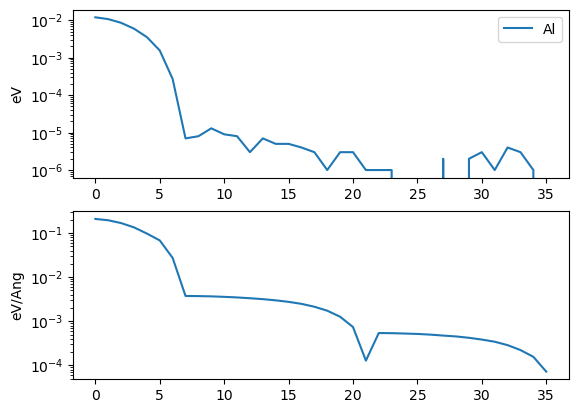

In [21]:
fig, ax = plt.subplots(2,1)
# ax[0].plot(job.output.energy_pot-job.output.energy_pot[-1], label='Mo')
ax[0].plot(remote.output.energy_pot-remote.output.energy_pot[-1], label='Al')
# ax[1].plot(job['output/generic/max_force'])
ax[1].plot(remote['output/generic/max_force'])
ax[0].legend()
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylabel('eV')
ax[1].set_ylabel('eV/Ang')
plt.show()

# Molecular dynamics

In [13]:
job = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_MD_local')
job.structure = pr.create.structure.bulk('W', a=3, cubic=True)*(3,3,3)
job.calc_md(temperature=1000, n_ionic_steps=1000, n_print=10)
job.run()

2024-12-19 23:00:12,055 - pyiron_log - WARNING - The job CHGNET_test_MD_local is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2024-12-19 23:00:12,055 - pyiron_log - WARNING - The job CHGNET_test_MD_local is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [14]:
job['input']

{'groups': ['chgnet', 'generic'], 'nodes': ['generic_dict']}

In [15]:
job['output']

{'groups': ['generic', 'structure'], 'nodes': []}

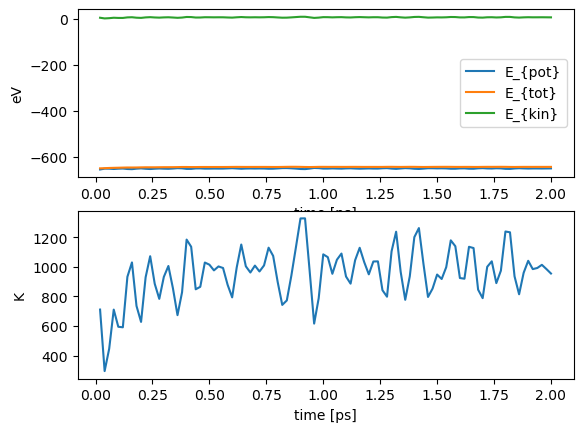

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].plot(job['output/generic/time'], job.output.energy_pot, label='E_{pot}')
ax[0].plot(job['output/generic/time'], job['output/generic/energy_tot'], label='E_{tot}')
ax[0].plot(job['output/generic/time'], job['output/generic/energy_kin'], label='E_{kin}')
ax[1].plot(job['output/generic/time'], job['output/generic/temperature'])
ax[0].legend()
ax[0].set_ylabel('eV')
ax[1].set_ylabel('K')
ax[0].set_xlabel('time [ps]')
ax[1].set_xlabel('time [ps]')
plt.show()

## Example with local fixes

More info: [https://wiki.fysik.dtu.dk/ase/ase/constraints.html](https://wiki.fysik.dtu.dk/ase/ase/constraints.html)

In [22]:
job = pr.create_job(job_type=CHGNet, job_name='CHGNET_test_MD_fix_local')
job.structure = pr.create.structure.bulk('W', a=3, cubic=True)*(3,3,3)
job.calc_md(temperature=1000, n_ionic_steps=1000, n_print=10)
job.input['fix_imports'] = 'from ase.constraints import FixAtoms'
job.input['fixes'] = 'FixAtoms(indices=[a.index for a in struct if a.y<5])'
job.run()

2024-12-19 23:03:43,457 - pyiron_log - WARNING - The job CHGNET_test_MD_fix_local is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2024-12-19 23:03:43,457 - pyiron_log - WARNING - The job CHGNET_test_MD_fix_local is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [23]:
job.animate_structures()

NGLWidget(max_frame=100)